## Solar cell test data plotting via database connection.

RLH 020625

###  1. Read J-V scan data from Dataverse

* Verde tables `crf3d_sample_datas` and `crf3d_jv_test_datas`.
* db_dataverse.py contains classes `SampleDataverseTable` and `JVScanDataverseTable`.
* Step 1: Use the `recent_entries` function to see what samples are in the samples_data table.
* Step 2:Use the `recent_entries` function to load JV test data from the jv_test_data table.
* The result will be in the Dataframe `jv_test_recent_values`.

In [149]:
import numpy as np
import pandas as pd

from db_form import parameters_form           # Yoni's form code.
from db_dataverse import SampleDataverseTable # Dataverse code based on scripts by Felix.
from db_dataverse import JVScanDataverseTable # 

from datetime import date, datetime
import time
import os

import json

import lmfit as lm

import matplotlib.pyplot as plt
%matplotlib widget

#### This script reads from both the sample database and the jv test database.

In [150]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Step 1 $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#   Database parameters for the sample database.                         #
#   For Sample_Data on  Perovskite Data Developer, Verde Technologies.   #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

# It may be necessary to use the 'Connect' command in Powershell to change the user before running this cell.
#crm_url =  "https://orgc25b23b3.api.crm.dynamics.com/"        # Randall Headrick's Environment at UVM.
crm_url = "https://perovskitedevelop.api.crm.dynamics.com/"    # Perovskite Data Developer Environment at VerdeTechnologies. 

#sample_table_logical_name =  "cr69a_sampledatav2s"
sample_table_logical_name =  "crf3d_sample_datas"               # Perovskite Data Developer, Dataverse table.

# This is not a complete list, only a few that might be helpful to identify the sample.
Sample_table_logical_names = {
    "Sample ID": 'crf3d_sampleid', 
    "Operator": 'crf3d_operatorname', 
    "Perovskite Composition": 'crf3d_perovskitecomposition', 
    "HTL Material": 'crf3d_htlmaterial', 
    "ETL Material": 'crf3d_etlmaterial',
    "Top Capping Material": 'crf3d_topcappingpassivationmaterial', 
    "Bottom Capping Material": 'crf3d_bottomcappingpassivationmaterial', 
    "Bulk Passivation Materials": 'new_bulkpassivationmaterial', 
    "Is Encapsulated": 'crf3d_isencapsulated'
}
 
# View a list of samples in the database.
last_num= 15  ################### The number of Sample records to view, most recent first.############
sample_table = SampleDataverseTable(crm_url, sample_table_logical_name, col_logical_names=Sample_table_logical_names)
sample_ids, sample_recent_values, result = sample_table.recent_entries(last_num)
# print(sample_ids)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #


#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Step 2 $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#   Database parameters for the jv scan database.                        #
#   For J-V_Scan_Data on  Perovskite Data Developer, Verde Technologies. #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

#JV_scan_table_logical_name = "cr69a_jv_test_data_v3s"
JV_scan_table_logical_name = "crf3d_jv_test_datas"              # Perovskite Data Developer, Dataverse table.

col_logical_names = {
    'sample_id': 'crf3d_sample_id',
    'elapsed_time': 'crf3d_elapsed_time_sec',
    'base_time': 'crf3d_base_time_sec',  # New base_time value.
    'test_id': 'crf3d_test_id',
    'i_ph_suns': 'crf3d_iph_suns',
    'voc_v': 'crf3d_voc_v',
    'mpp_v': 'crf3d_mpp_v',
    'jsc_ma': 'crf3d_jsc_macm2',
    'rsh': 'crf3d_rsh',
    'rser': 'crf3d_rser',
    'ff': 'crf3d_ff_pct',
    'pce': 'crf3d_pce_pct',
    'operator': 'crf3d_operator_name',
    'scan_type': 'crf3d_scan_type',
    'lab_location': 'crf3d_location',
    'cell_number': 'crf3d_cell_number',
    'module': 'crf3d_module',
    'masked': 'crf3d_masked',
    'mask_area': 'crf3d_mask_area_cm2',
    'temp_c': 'crf3d_temperature_c',  # New.
    'hum_pct': 'crf3d_humidity_pct', # New.
    'four_wire_mode': 'crf3d_four_wire_mode', # New.
    'scan_data_path': 'crf3d_scan_path' # New.
}
image_column_name = 'new_jv_scan_plot'  # Optional column.

# Set up the J-V_Test_Data table.
jv_test_table = JVScanDataverseTable(crm_url=crm_url, table_name=JV_scan_table_logical_name, col_logical_names=col_logical_names)

# Retrieve the last num_vals of the jv test data.
num_vals= 1000
jv_test_ids, jv_test_recent_values, jv_test_result = jv_test_table.recent_entries(num_vals)
#print(jv_test_ids)


In [151]:
# sample_recent_values

In [152]:
jv_test_recent_values

,sample_id,elapsed_time,base_time,test_id,i_ph_suns,voc_v,mpp_v,jsc_ma,rsh,rser,...,scan_type,lab_location,cell_number,module,masked,mask_area,temp_c,hum_pct,four_wire_mode,scan_data_path
0,050225_FAPI_SA_Cr_Cu_C8,15.8,1747844410.46,050225_FAPI_SA_Cr_Cu_C8_6R_123553,0.8,0.96,0.55,15.71,148.19,28.04,...,R,Upstairs (W426),6,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
1,050225_FAPI_SA_Cr_Cu_C8,15.73,1747844410.46,050225_FAPI_SA_Cr_Cu_C8_6F_123553,0.8,0.9,0.53,14.14,77.13,32.85,...,F,Upstairs (W426),6,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
2,050225_FAPI_SA_Cr_Cu_C8,14.75,1747844410.46,050225_FAPI_SA_Cr_Cu_C8_5R_123451,0.8,0.96,0.69,18.68,289.94,11.64,...,R,Upstairs (W426),5,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
3,050225_FAPI_SA_Cr_Cu_C8,14.69,1747844410.46,050225_FAPI_SA_Cr_Cu_C8_5F_123451,0.8,0.9,0.57,17.61,100.78,22.76,...,F,Upstairs (W426),5,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
4,050225_FAPI_SA_Cr_Cu_C8,13.27,1747844410.46,050225_FAPI_SA_Cr_Cu_C8_4R_123321,0.8,0.98,0.71,19.94,400.8,8.3,...,R,Upstairs (W426),4,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,04302025_Module_M4,158.3,1746027098.53,04302025_Module_M4_1R_140950,0.8,0.95,0.9,1.53,65285.34,31.22,...,R,Upstairs (W426),1,False,False,0,23,0,True,C:\Users\LabUser\OneDrive - Verde Technologies...
996,04302025_Module_M2,156.85,1746027098.53,04302025_Module_M2_1R_140823,0.8,1.06,1,1.53,136329.4,11.15,...,R,Upstairs (W426),1,True,False,0,23,0,True,C:\Users\LabUser\OneDrive - Verde Technologies...
997,04302025_Module_M2,156.75,1746027098.53,04302025_Module_M2_1F_140823,0.8,0.58,0.7,1.51,6409.33,123.09,...,F,Upstairs (W426),1,True,False,0,23,0,True,C:\Users\LabUser\OneDrive - Verde Technologies...
998,04302025_Module_M2,152.47,1746027098.53,04302025_Module_M2_1R_140401,0.8,0.87,0.65,1.52,49487.4,100.74,...,R,Upstairs (W426),1,True,False,0,23,0,True,C:\Users\LabUser\OneDrive - Verde Technologies...


In [153]:
jv_test_recent_values['scan_data_path'][0]

'C:\\Users\\LabUser\\OneDrive - Verde Technologies\\Documents\\data2\\K2401SSDB\\Pramod_052125/050225_FAPI_SA_Cr_Cu_C8_6R_123553.csv'

### 2. Data filtering, clumping, and test condition parameters.

* Manually gathered information:
  * Operator name --> use it to make a report folder. Pull the default from the first test record.
  * Sample name filtering using a manual parameter. i.e. '012725_' to narrow down the sample list.
  * Data clumping parameters: (1) max clump width i.e. 2 hrs, (2) min gap width i.e. 1 hour. 


- Use a form to gather more information:
  *  Use a checkbox selection to compare different samples.
  *  Choice of parameters to  plot:  PCE, FF, Voc, Jsc, MPP, Rser, Rshunt
  *  Plot type: (1) time series, or (2) box plot (compares up to 4 samples).
  *  Include sample data with the report? (Y/N)
  *  Save a hard copy of the report? (Y/N)
 
* Timeseries test plot.
  * The final plots are in section 3.
 
- Clumping
  *  Clumps are sets of measurents performed in a narrow time window (e.g. several hours).
  *  Normally, the data within each clump will be averaged.
  *  Parameters are max_clump_width and min_gap_width.
 
* Finishing details:
  * List of degradation tests.
    * conditions: temperature, humidity, lamp, MPP vs Voc, etc.
    * Start time  in  ```YYYY-MM-DD hh:mm:ss``` format.
    * End time in  ```YYYY-MM-DD hh:mm:ss``` format.

#### Manual parameters

In [154]:
### X.X ###
# Everything should be relative to jupyter_notebook_path.  
# There will be other folders created,such as ../{operator}_{date}
jupyter_notebook_path = os.getcwd()
%pwd

'C:\\Users\\takaj\\Desktop\\VerdeDBTakaji'

In [155]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Sample ID filtering $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#                                                                                                         #
#                           Change the filters below to select a list of samples.                         #
#                                                                                                         #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

sample_filter_1 = ''       # Change this to filter a range of samples.        Use '' to match everything.
sample_filter_2 = ''      # Use this one to narrow or broaden the filter.    Use '' to match everything. 
sample_filter_operator = 'or'       # Operator for sample_filter_1 and _2.

if sample_filter_operator == 'and':
    sample_id_list = [sample_id for sample_id in sample_ids if (sample_filter_1 in sample_id) and (sample_filter_2 in sample_id)]
elif sample_filter_operator == 'or':
    sample_id_list = [sample_id for sample_id in sample_ids if (sample_filter_1 in sample_id) or (sample_filter_2 in sample_id)]
else:
    sample_id_list = []
    raise Exception("sample_filter_operator must be either \'and\' or \'or\'.")

sample_id_list

['051625_FAPI_SA_SnO2_Quanex_PIB_SP_C7',
 '051625_FAPI_SA_SnO2_Quanex_PIB_Edge_C6',
 '051625_FAPI_SA_SnO2_Thick_PIB_Edge_C5',
 '051625_FAPI_SA_SnO2_Thick_PIB_Edge_C4',
 '051625_FAPI_SA_SnO2_Al2O3_Blanket_PIB_C3',
 '051625_FAPI_SA_SnO2_Al2O3_Blanket_PIB_C2',
 '051625_FAPI_SA_BCP_Blanket_PIB_C1',
 '05162025_FAPI_Module_M4',
 '05162025_FAPI_Module_M3',
 '05162025_FAPI_Module_M2',
 '05162025_FAPI_Module_M1',
 '051225_FAPI_SA_SnOx_AlOx_87C_17nm_C4',
 '051225_FAPI_SA_SnOx_AlOx_87C_17nm_C3',
 '051225_FAPI_SA_SnOx_87C_17nm_C2',
 '051225_FAPI_SA_SnOx_87C_17nm_C1']

In [156]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Get the operator name $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#                                                                                                         #
#                       Use the 'operator' for the first 'sample_id' as the default.                      #
#                                                                                                         #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

jv_test_operator_list = list(jv_test_recent_values[ 'operator' ])
jv_test_sample_id_list = list(jv_test_recent_values[ 'sample_id' ])
ind = jv_test_sample_id_list.index(sample_id_list[0])                # index of the first sample in sample_id_list
default_operator =   str(jv_test_operator_list[ind])

operator = input("Operator name: ") or default_operator
if operator == default_operator:
    print(f"                {operator}")

dir_path_local = os.path.normpath(os.path.join(jupyter_notebook_path, f"../Reports/{operator}")) 

today = date.today()
#today = date(2025, 1, 27)
path = dir_path_local + "_" + today.strftime("%m%d%y")
print(path)

Operator name:  


                Pramod
C:\Users\takaj\Desktop\Reports\Pramod_052125


#### Launch the Form and get the Form parameters

In [157]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Form parameters $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
# Operator        # This will be a fixed value, changeable in the cell above.                    #
# Sample names    # Select multiple samples                                                      #
# Parameters to plot: PCE, FF, Voc, Jsc, MPP, Rser, Rshunt   # radio buttons.                    #
# Plot type.  Choice of either Time series (one sample) or Box plot (compares up to 4 samples).  #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

# The questions json file can be anywhere, but it will usually be in the directory with this Notebook.
questions_file_main= os.path.join(jupyter_notebook_path, "main_questions.json")

form = parameters_form(persistent=True, dir_path_local=dir_path_local, 
                               questions_file_main=questions_file_main, checkbox_values=sample_id_list)
print(form.checkbox_values)
form.display_question_canvas()

['051625_FAPI_SA_SnO2_Quanex_PIB_SP_C7', '051625_FAPI_SA_SnO2_Quanex_PIB_Edge_C6', '051625_FAPI_SA_SnO2_Thick_PIB_Edge_C5', '051625_FAPI_SA_SnO2_Thick_PIB_Edge_C4', '051625_FAPI_SA_SnO2_Al2O3_Blanket_PIB_C3', '051625_FAPI_SA_SnO2_Al2O3_Blanket_PIB_C2', '051625_FAPI_SA_BCP_Blanket_PIB_C1', '05162025_FAPI_Module_M4', '05162025_FAPI_Module_M3', '05162025_FAPI_Module_M2', '05162025_FAPI_Module_M1', '051225_FAPI_SA_SnOx_AlOx_87C_17nm_C4', '051225_FAPI_SA_SnOx_AlOx_87C_17nm_C3', '051225_FAPI_SA_SnOx_87C_17nm_C2', '051225_FAPI_SA_SnOx_87C_17nm_C1']


Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

Button(button_style='success', description='Submit', style=ButtonStyle())

In [158]:
# Check to make sure the responses are what you want.
print(form.responses)

[]


In [159]:
### X.X  ###
# Convert the form responses into a dictionary for easier indexing.
form_questions = [question['question'] for question in form.questions]

form_responses_new = list(form.responses)
sample_id_filter = form_responses_new[1] # position [1] refers to the sample id checkbox responses.
form_responses_new[1] = [id for indx,id in enumerate(sample_id_list) if sample_id_filter[indx] == True]
form_responses_dictionary = dict(zip(form_questions, form_responses_new))


print(form_responses_dictionary)
print("-")

# Check if the form responses are valid.
if len(form_responses_dictionary['Sample names? (select up to four)']) == 0:
    raise Exception("At least one sample must be selected.")
elif form_responses_dictionary["Plot type?"] == "Box plot":
    if len(form_responses_dictionary['Sample names? (select up to four)'])  > 4:
        raise Exception("No more than four samples should be selected for Box plot.")
elif form_responses_dictionary["Plot type?"] == "Time series":
        if len(form_responses_dictionary['Sample names? (select up to four)'])  > 1:
            raise Exception("Only one sample should be selected for Time series.")
             
print("Form responses are valid.")

IndexError: list index out of range

In [91]:
form_responses_dictionary['Sample names? (select up to four)']

['050225_FAPI_SA_Cr_Cu_C8']

#### Initial look at the J-V scan results.

* Filter the data using the form parameters.
* Make a time series plot.

In [94]:
# timestamp conversion functions.

def epoch_to_timestamp(ts):
    '''Convert a unix epoch to a YYYY-MM-DD hh:mm:ss timestamp'''
    return datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

def timestamp_to_epoch(dt):
    '''Convert YYYY-MM-DD hh:mm:ss timestamp string to a unix epoch'''
    datetime_obj = datetime.strptime(dt, "%Y-%m-%d %H:%M:%S")
    return  datetime_obj.timestamp()

In [97]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Create a list of Dataframes $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#                                                                                                         #
#               Each dataframe in 'jv_test_data_list' holds JV data for a different sample.               #
#                  The corresponding sample ids are in the list  'sample_ids_selected'.                   #
#                                                                                                         #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
sample_ids_selected = form_responses_dictionary['Sample names? (select up to four)']
jv_test_data_list = []    # This list will hold one dataframe of JV data for each sample_id.
for sample_id in sample_ids_selected:
   jv_test_data_list.append(jv_test_recent_values[jv_test_recent_values["sample_id"]==sample_id])

PCE (%)
PCE (%)
pce


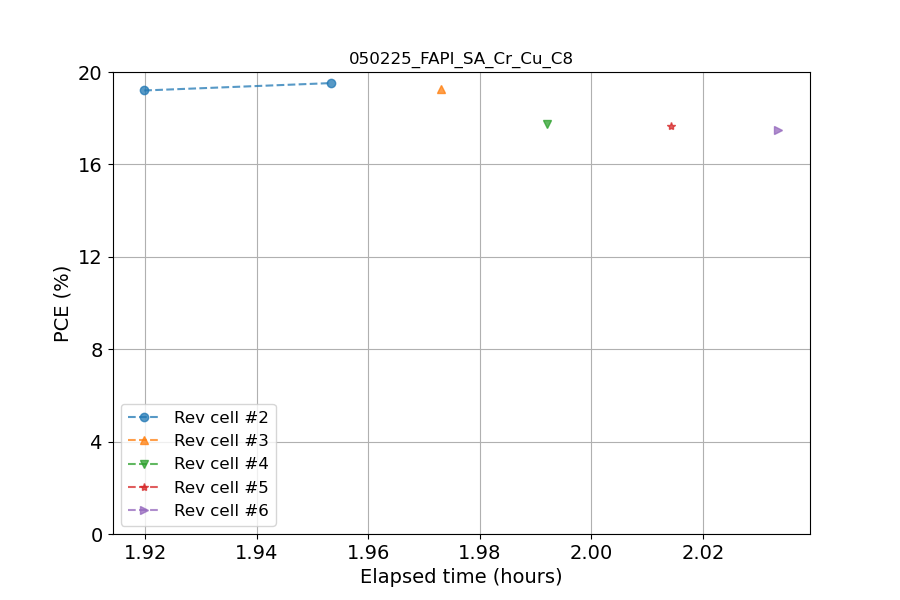

In [99]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ First look at the JV data $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#                                                                                                         #
#                The simplest plot is time. Plot the JV data for the first selected sample.               #
#                                                                                                         #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

# Look at the first sample in the selection list.
sample_id = sample_ids_selected[0]
df = jv_test_data_list[0]

# Select just the columns I need for the analaysis.
df2 = df[['cell_number','pce', 'voc_v', 'ff', 
          'jsc_ma', 'scan_type', 'mpp_v', 'rser', 'rsh']].copy()  # to do: add 'test_status' to the list of columns.

# Reconstruct the timestamp from the unix epoch.
tsl = df['base_time'].astype(float)+60.0*df['elapsed_time'].astype(float)
timestamp_series = tsl.apply(epoch_to_timestamp)

# Insert the timestamp into the dataframe with column heading "measured_on".
df2.insert(0,"measured_on", timestamp_series)
MIN_BASE_TIME = min(df['base_time'].astype(float))
df2.insert(1,"time_hrs", (tsl-MIN_BASE_TIME)/3600)

# Split the data into forward and reverse scan types.
df2_fwd = df2.loc[df['scan_type'] == 'F']
df2_rev = df2.loc[df['scan_type'] == 'R']

# Selected parameter to plot.
parameter_ylabel = form_responses_dictionary['Parameter to plot?']
print(parameter_ylabel)
if parameter_ylabel == 'PCE (%)':
    parameter_to_plot = "pce"
elif parameter_ylabel == 'FF (%)':
    parameter_to_plot = "ff"
elif parameter_ylabel == 'Voc (V)':
    parameter_ylabel = r'V$_{oc}$ (V)'
    parameter_to_plot = "voc_v"
elif parameter_ylabel == 'Jsc (mA/cm^2)':
    parameter_ylabel = r'J$_{sc}$ (mA/cm$^2$)'
    parameter_to_plot = "jsc_ma"
elif parameter_ylabel == 'MPP (V)':
    parameter_to_plot = "mpp_v"
elif parameter_ylabel == 'Rser (Ohm-cm^2)':
    parameter_ylabel = r'R$_{ser}$ (Ohm-cm$^2$)'
    parameter_to_plot = "rser"
elif parameter_ylabel == 'Rsh (Ohm-cm^2)':
    parameter_ylabel = r'R$_{sh}$ (Ohm-cm$^2$)'
    parameter_to_plot = "rsh"
else:
    raise Exception("Invalid parameter ylabel")
print(parameter_ylabel)
print(parameter_to_plot)

# Set the font.
plt.rcParams.update({'font.size': 14})

# Make the plot.
fig, ax = plt.subplots(figsize=(9,6))
direction_response = form_responses_dictionary["Scan direction?"] 
# If we are plotting both Fwd and Rev, then don't label individual cell numbers.
if direction_response == "both":
    alpha_val = 0.5
    plt.plot(df2_rev["time_hrs"], df2_rev[parameter_to_plot].astype(float), 'co', label="Reverse sweep", alpha=alpha_val)
    plt.plot(df2_fwd["time_hrs"], df2_fwd[parameter_to_plot].astype(float), 'ro', label="Forward sweep", alpha=alpha_val)
# If we are plotting only one direction then we will label individual cell numbers.
elif (direction_response == "forward") or (direction_response == "reverse"):
    if direction_response == "forward":
        dir = "Fwd"
        symbols = ['.', 's--', 'o--', '^--', 'v--', '*--', '>--']
        alpha_val = 0.75
        for cellnum in range(1,7):
            df2_onecell = df2_fwd.loc[df2_fwd['cell_number'] == str(cellnum)]
            if len(df2_onecell) > 0:
                plt.plot(df2_onecell["time_hrs"], df2_onecell[parameter_to_plot].astype(float), 
                     symbols[cellnum], label=f"{dir} cell #{cellnum}", alpha=alpha_val)
    else:
        dir = "Rev"
        symbols = ['.', 's--', 'o--', '^--', 'v--', '*--', '>--']
        alpha_val = 0.75
        for cellnum in range(1,7):
            df2_onecell = df2_rev.loc[df2_rev['cell_number'] == str(cellnum)]
            df2_onecell = df2_onecell.sort_values(by='time_hrs')
            if len(df2_onecell) > 0:
                #
                # try:
                #     xdata = np.array(df2_onecell["time_hrs"].astype(float))
                #     # print("xdata=", xdata)
                #     ydata = np.array(df2_onecell[parameter_to_plot].astype(float))
                #     # print("ydata=", ydata)
                #     model = lm.Model(Constant) - lm.Model(Stretch_Exp)
                #     params = model.make_params()
                #     params['constant'].set(ydata[-1],min=0.0001,max=10)
                #     params['amp'].set(-ydata[0]+ydata[-1])
                #     params['tau'].set(200,min=20,max=9999.9)
                #     params['shift'].set(xdata[0])
                #     params['beta'].set(1.0,min=0.8,max=1.2)
                #     print("xdata=",xdata," \nydata=",ydata)
                #     result = model.fit(ydata,params,x=np.array(xdata))
                #     y0 = result.best_fit
                #     print(" \ny0=",y0)
                #     print(result.best_values)
                #     # result.plot_fit(show_init=True)
                #     plt.plot(xdata,y0,'-')
                #     print("----")
                # except:
                #     print("Error for cell # ",cellnum)
                #     print("----")
                #
                plt.plot(df2_onecell["time_hrs"], df2_onecell[parameter_to_plot].astype(float), 
                     symbols[cellnum], label=f"{dir} cell #{cellnum}", alpha=alpha_val)
               


plt.xlabel("Elapsed time (hours)")
plt.ylabel(parameter_ylabel)
plt.title(sample_id, fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.ylim(0,20)
ax.set_yticks([0,4,8,12,16,20])

In [101]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [103]:
print("                               ",color.DARKCYAN + color.BOLD + sample_id)
df2[df2['cell_number']=='5']

                                050225_FAPI_SA_Cr_Cu_C8


,measured_on,time_hrs,cell_number,pce,voc_v,ff,jsc_ma,scan_type,mpp_v,rser,rsh
58,2025-05-02 11:23:35,2.014333,5,17.67,1.12,65.94,23.86,R,0.91,6.17,1555.63
59,2025-05-02 11:23:30,2.012833,5,14.87,1.08,58.04,23.71,F,0.79,8.34,795.53


In [105]:
print("                               ", color.DARKCYAN + color.BOLD + sample_id)
df2_rev.sort_values(by='time_hrs')

                                050225_FAPI_SA_Cr_Cu_C8


,measured_on,time_hrs,cell_number,pce,voc_v,ff,jsc_ma,scan_type,mpp_v,rser,rsh
66,2025-05-02 11:17:55,1.919833,2,19.2,1.1,67.82,25.64,R,0.87,6.72,2230.67
64,2025-05-02 11:19:56,1.953333,2,19.52,1.12,68.24,25.64,R,0.89,5.71,1884.78
62,2025-05-02 11:21:06,1.973000,3,19.27,1.11,65.88,26.25,R,0.87,7.58,2159.53
60,2025-05-02 11:22:15,1.992000,4,17.76,1.13,65.8,23.98,R,0.89,7.13,1535.25
58,2025-05-02 11:23:35,2.014333,5,17.67,1.12,65.94,23.86,R,0.91,6.17,1555.63
56,2025-05-02 11:24:44,2.033500,6,17.49,1.11,66.11,23.78,R,0.89,5.49,1527.76


#### Searching for clumps.

* Clumps are sets of measurements performed in a narrow time window (e.g. several hours).
* Normally, the data within each clump will be averaged to produce mean, median, 25% and 75% values.

In [108]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Data clumping parameters $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#                                                                                                         #
#                       They are used to group data points in the time-series plot.                       #
#                                                                                                         #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
min_gap_width   = 1.0   # hours.  Clumps must have a gap between them of at least this amount or they will be combined.
max_clump_width = 2.0   # hours.  If measurments in the same clump are separated by more than this amount, an Exception will be raised.

In [110]:
#        
# Approach: Work with the list of DataFrames 'jv_test_data_list'.
#           Break the dataframes down into 'clumps'.
#           In order to keep it simple, add a new column to each dataframe with the clump number.
#           We don't need to distinguish between 'F' and 'R' sweeps. They can be together in the same clump.
#
def dataframe_clumping(jv_test_data_list):
    '''Add a column to each DataFrame in the list with the clump number for each JV measurement'''
    jv_test_data_list_2 = [] # Output list to be built in the code below.
    for df in jv_test_data_list:
        # Select just the columns I need for the analaysis.
        df2 = df[['cell_number','pce', 'voc_v', 'ff', 
                  'jsc_ma', 'scan_type', 'mpp_v', 'rser', 'rsh']].copy()  # to do: add 'test_status' to the list of columns.
        
        # Reconstruct the timestamp from the unix epoch.
        tsl = df['base_time'].astype(float)+60.0*df['elapsed_time'].astype(float)
        timestamp_series = tsl.apply(epoch_to_timestamp)
        
        # Insert the timestamp into the dataframe with column heading "measured_on".
        df2.insert(0,"measured_on", timestamp_series)
        df2.insert(1,"time_hrs", (tsl-min(df['base_time'].astype(float)))/3600)

        # Sort the dataframe by time.
        df2_sorted = df2.sort_values(by='time_hrs')

        # Convert the times into a list.
        # column_names = df2_sorted.columns
        # print(column_names)
        
        # Compute the time intervals.
        time_hrs_list = df2_sorted['time_hrs'].to_list()
        time_hrs_list_shifted = [0] + time_hrs_list[:-1]
        time_intervals = [t2-t1 for t2,t1 in zip(time_hrs_list, time_hrs_list_shifted)]

        # Assign the clump numbers.
        clump_assignments = [0] # The first measurment is in clump 0.
        clump_elapsed_time_list = [0] # How long since the first measurement in the clump.
        clump_number = 0
        # Skip the first time interval in the for loop below. 
        clump_elapsed_time = 0
        for ind in range(1,len(time_intervals)):
            if time_intervals[ind] >= min_gap_width:
                clump_number += 1
                clump_elapsed_time = 0
            else:
                clump_elapsed_time += time_intervals[ind]
                if clump_elapsed_time > max_clump_width:
                    raise Exception(f"clump_elapsed_time {round(clump_elapsed_time,5)} is larger than the max_clump_width  of {max_clump_width}")
            clump_assignments.append(clump_number)
            clump_elapsed_time_list.append(clump_elapsed_time)

        # Insert the clump numbers into the dataframe with heading 'clump_number'
        df2_sorted.insert(2,"clump_number", clump_assignments)
        # df2_sorted.insert(3,"clump_elapsed_time", clump_elapsed_time_list)

        # Add the modifed Dataframe to the new jv test dat list.
        jv_test_data_list_2.append(df2_sorted)

    return jv_test_data_list_2

In [112]:
jv_test_data_list_2 = dataframe_clumping(jv_test_data_list)

In [114]:
jv_test_data_list_2[0]

,measured_on,time_hrs,clump_number,cell_number,pce,voc_v,ff,jsc_ma,scan_type,mpp_v,rser,rsh
67,2025-05-02 11:17:50,1.918333,0,2,14.89,1.06,54.98,25.5,F,0.75,8.29,782.22
66,2025-05-02 11:17:55,1.919833,0,2,19.2,1.1,67.82,25.64,R,0.87,6.72,2230.67
65,2025-05-02 11:19:51,1.952000,0,2,15.73,1.08,57.01,25.57,F,0.79,7.72,583.04
64,2025-05-02 11:19:56,1.953333,0,2,19.52,1.12,68.24,25.64,R,0.89,5.71,1884.78
63,2025-05-02 11:21:02,1.971667,0,3,14.8,1.08,52.71,26.11,F,0.75,12.45,488.99
62,2025-05-02 11:21:06,1.973000,0,3,19.27,1.11,65.88,26.25,R,0.87,7.58,2159.53
61,2025-05-02 11:22:11,1.991000,0,4,14.83,1.09,57.2,23.86,F,0.79,11.63,807.28
60,2025-05-02 11:22:15,1.992000,0,4,17.76,1.13,65.8,23.98,R,0.89,7.13,1535.25
59,2025-05-02 11:23:30,2.012833,0,5,14.87,1.08,58.04,23.71,F,0.79,8.34,795.53
58,2025-05-02 11:23:35,2.014333,0,5,17.67,1.12,65.94,23.86,R,0.91,6.17,1555.63


#### Load the JSON file with the degradation test parameters

* The json file will normally be stored in the Reports folder.
* See the variable ```dir_path_local```.

In [117]:
def read_json_file(file_path):
    """
    Reads a JSON file and returns its content as a Python dictionary.

    Args:
        file_path (str): The path to the JSON file.

    Returns:
        dict: A dictionary representing the JSON data, or None if an error occurs.
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in '{file_path}'")
        return None
    except Exception as e:
         print(f"An unexpected error occurred: {e}")
         return None

In [119]:
dir_path_local

'C:\\Users\\takaj\\Desktop\\Reports\\Pramod'

In [121]:
# Change the file name below as needed.
file_path = dir_path_local + '/' + 'Pramod_questions_latest.json'

tests = read_json_file(file_path)

if tests:
    # Process the data
    print(tests)

[{'answers': ['Seid', 'Randy', 'Pramod', 'Rosinda'], 'default': 'Pramod', 'question': 'Operator', 'question_type': 'radio'}, {'default': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False], 'question': 'Sample names? (select up to four)', 'question_type': 'checkbox'}, {'answers': ['PCE (%)', 'FF (%)', 'Voc (V)', 'Jsc (mA/cm^2)', 'MPP (V)', 'Rser (Ohm-cm^2)', 'Rsh (Ohm-cm^2)'], 'default': 'PCE (%)', 'question': 'Parameter to plot?', 'question_type': 'radio'}, {'answers': ['forward', 'reverse', 'both'], 'default': 'reverse', 'question': 'Scan direction?', 'question_type': 'radio'}, {'answers': ['Time series', 'Box plot'], 'default': 'Time series', 'question': 'Plot type?', 'question_type': 'radio'}]


In [123]:
# Extract lists of starttimes and endtimes.
start_time_list = [test['start'] for test in tests if 'test' in test]
end_time_list = [test['end'] for test in tests if 'test' in test]
samples_list =  [test['samples'] for test in tests if 'test' in test]
      
# check to make sure there are the same number of start and end times.
start_count = len(start_time_list)
end_count  = len(end_time_list)
if start_count == end_count:
    print(f"Found {start_count} start and end times.")
else:
    raise Exception(f" The number of start times ({start_count}) and end times ({end_count}) are different.")

# Combine the start and end times in a list of tuples
start_end_time_list = [(s,e) for s, e in zip(start_time_list, end_time_list)]

# Also make a Dataframe with all the key:value pairs
keys = list(tests[0].keys())
tests_df = pd.DataFrame(tests, columns=keys)

Found 0 start and end times.


In [81]:
tests_df

,answers,default,question,question_type
0,"[Seid, Randy, Pramod, Rosinda]",Pramod,Operator,radio
1,NaN,"[False, False, False, False, False, False, Fal...",Sample names? (select up to four),checkbox
2,"[PCE (%), FF (%), Voc (V), Jsc (mA/cm^2), MPP ...",MPP (V),Parameter to plot?,radio
3,"[forward, reverse, both]",reverse,Scan direction?,radio
4,"[Time series, Box plot]",Box plot,Plot type?,radio


In [83]:
tests_df['samples'][5]  # This is the df of stability tests.

KeyError: 'samples'

###  3. Make the final plots

* Define time_range for the fill-between areas.

In [85]:
# error boxes function
def make_error_boxes(ax, xdata, xerror, yerror_25, yerror_75, facecolor='r', edgecolor='none', alpha=0.5):
    '''Create boxes with the same x-widths and absolute upper and lower edges.'''
    errorboxes = []
    xe = xerror
    for x, ye25, ye75 in zip(xdata, yerror_25, yerror_75):
        # print(f' x={x}, ye25={ye25}, ye75={ye75} ')
        rect = patches.Rectangle((x - xe, ye25), 2.0*xe, ye75 - ye25, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha)
        errorboxes.append(rect)
    
    for box in errorboxes:
        ax.add_patch(box)

In [ ]:
def timestamp_to_elapsed_time(timestamp, min_base_time):
    '''Return the elapsed time in hours from the timestamp and the offset epoch'''
    return float(timestamp_to_epoch(timestamp) -  min_base_time)/3600

In [ ]:
# Construct the list of relative start and end times of the stability tests.
start_end_times_list = []
for ind in range (len(tests_df)):
    if sample_id in tests_df['samples'][ind]:
        ss = timestamp_to_elapsed_time(tests_df['start'][ind], MIN_BASE_TIME)
        ee = timestamp_to_elapsed_time(tests_df['end'][ind], MIN_BASE_TIME)
        test_type = tests_df['test'][ind]
        print(ind, ss, ee)
        start_end_times_list.append([ss, ee, test_type])

In [ ]:
# Compute fill_between time_ranges from the time stamps.
# These are the times of the degradation tests
# times are in hours, relative to MIN_BASE_TIME.
fill_time_ranges = [[(timestamp_to_epoch(s)-MIN_BASE_TIME)/3600,
                    (timestamp_to_epoch(e)-MIN_BASE_TIME)/3600]  
                    for s,e in zip(start_time_list, end_time_list)]

# Filter these fill_time_ranges by sample_id.  

filtered_fill_range_list = [ftr for sl, ftr in zip(samples_list, fill_time_ranges) if sample_id in sl]
filtered_test_duration_list =  [ttr[1]-ttr[0] for ttr in filtered_fill_range_list]

print("---------------------------------------------------------------------------")
print("sample_id:                 ", sample_id)
print("Stability test time ranges:", filtered_fill_range_list )
print("Stability test durations:  ", filtered_test_duration_list)

# The data time ranges can be found from the clump labels.

df_sample = jv_test_data_list_2[0]    # Assume just one sample_id.
clump_max = max(df_sample['clump_number'])

time_ranges = []
for clump_index in range(clump_max+1):
    df_clump = df_sample[df_sample['clump_number'] == clump_index]
    time_ranges.append((min(df_clump['time_hrs']), max(df_clump['time_hrs'])))

print("---------------------------------------------------------------------------")
print("Measurement time ranges (clumps):", time_ranges)

In [ ]:
# lmfit models

# Constant function
def Constant(x,constant):
    return constant

# Stretched Exponential
def Stretch_Exp(x,amp,tau,shift,beta):
    return amp*np.exp(-((x-shift)/tau)**beta)

In [ ]:
# Make the plot

# Split the data into forward and reverse scan types.
df_sample_fwd = df_sample.loc[df['scan_type'] == 'F']
df_sample_rev = df_sample.loc[df['scan_type'] == 'R']

fig, ax = plt.subplots(figsize=(10, 7))

clump_median = []
clump_median_time = []
clump_champ = []
for clump_index in range(clump_max+1):
    df_clump = df_sample_rev[df_sample_rev['clump_number'] == clump_index]
    xdata = list(df_clump['time_hrs'])
    xdata = [float(x) for x in xdata]
    ydata = list(df_clump['pce'])
    ydata = [float(y) for y in ydata]
    clump_median_time.append(np.median(xdata))
    clump_median.append(np.median(ydata))
    clump_champ.append(np.max(ydata))
   
    plt.plot(xdata, ydata, 'bo')
    #
plt.plot(xdata, ydata, 'bo', label="Reverse")
plt.plot(clump_median_time, clump_median, 'b--', label="Reverse median")
plt.plot(clump_median_time, clump_champ, 'b-.', label="Reverse champion")
# Also plot the  Forward data
clump_median = []
clump_median_time = []
for clump_index in range(clump_max+1):
    df_clump = df_sample_fwd[df_sample_fwd['clump_number'] == clump_index]
    xdata = list(df_clump['time_hrs'])
    ydata = list(df_clump['pce'])
    ydata = [float(y) for y in ydata]
    clump_median_time.append(np.median(xdata))
    clump_median.append(np.median(ydata))
    plt.plot(xdata, ydata, 'mo')
plt.plot(xdata, ydata, 'mo', label="Forward")
plt.plot(clump_median_time, clump_median, 'm--', label="Forward median")

for test_times in start_end_times_list:
    ss = test_times[0]
    ee = test_times[1]
    test_type = test_times[2]
    yrange = np.array([0,100])
    plt.fill_betweenx(yrange, ss, ee, alpha=0.55, label=f"{test_type}")

plt.legend()

plt.title(sample_id)
plt.xlabel("Time (hrs)")
plt.ylabel(parameter_ylabel)
plt.ylim(0,20)
ax.set_yticks([0,4,8,12,16,20])
# plt.grid()

In [ ]:




    # #
    # model = lm.Model(Constant) - lm.Model(Stretch_Exp)
    # params = model.make_params()
    # params['constant'].set(ydata[-1],min=0.0001,max=10)
    # params['amp'].set(-ydata[0]+ydata[-1])
    # params['tau'].set(100,min=20,max=9999.9)
    # params['shift'].set(xdata[0])
    # params['beta'].set(1.0,min=0.8,max=1.2)
    # y0 = model.eval(params,x=np.array(xdata))
    # print("xdata=",xdata," \nydata=",ydata," \ny0=",y0)
    # print("----")
    # #